In [1]:
import os
import glob
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import pandas as pd

In [2]:
path=r"E:\2011_197_onwards"

In [3]:
projection='GEOGCS["Unknown datum based upon the Clarke 1866 ellipsoid",DATUM["Not specified (based on Clarke 1866 spheroid)",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'
geotrans=(-180.0, 0.05, 0.0, 90.0, 0.0, -0.05)

In [4]:
def WriteImage(outpath,image,proj,geo):
    ds=None
    driver=gdal.GetDriverByName("GTiff")
    ds=driver.Create(outpath,image.shape[1],image.shape[0], 1,gdal.GDT_Float32)
    ds.SetProjection(proj)
    ds.SetGeoTransform(geo)
    ds.GetRasterBand(1).WriteArray(image)
    return ds

In [5]:
def Day_LST():
    f1='HDF4_EOS:EOS_GRID:"E:\\2011_197_onwards\\'
    f2='":MODIS_CMG_3MIN_LST:LST_Day_CMG'
    for root, dirs, files in os.walk(path):
        for name in files:
            filepath=f1+name+f2
            print(filepath)
            data=gdal.Open(filepath)
            lst=data.ReadAsArray().astype("float64")
            lst[lst<7500]=np.nan
            lst[lst>65535]=np.nan
            lst=lst*0.02
            print(np.nanmin(lst),np.nanmax(lst))
    #         output_proj=r"E:\\rahul\MODIS_Resample_LST\new_proj" + name +'.tif'
            output_resample=r"E:\2011_197_onwards_LST\ " + name +'.tif'
            VE=WriteImage(" ",lst,projection,geotrans)
            t=gdal.Warp(output_resample,VE,
                         xRes=0.05,yRes=0.05,
                          resampleAlg='bilinear'
                         )
            VE=None
            t=None

In [6]:
Day_LST()

HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011197.006.2016077041914.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
195.38 344.86
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011198.006.2016077042624.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
193.28 345.06
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011199.006.2016077042626.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
191.9 344.88
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011200.006.2016077043213.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
191.3 347.44
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011201.006.2016077040648.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
189.1 344.5
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011202.006.2016077041117.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
193.16 342.74
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011203.006.2016077041431.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
196.68 345.58
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011204.006.2016077042000.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
197.62 344.46
HDF4_EOS:EOS

186.4 339.52
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011262.006.2016077042928.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
186.62 340.44
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011263.006.2016077042924.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
186.72 340.24
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011264.006.2016077043345.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
186.82 340.44
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011265.006.2016077040927.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
186.24 343.54
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011266.006.2016077041243.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
189.36 343.68
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011267.006.2016077041609.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
190.3 339.64
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011268.006.2016077042301.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
184.34 339.64
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011269.006.2016077042313.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
188.56 348

221.14000000000001 335.52
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011327.006.2016077193513.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
219.26 340.68
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011328.006.2016077210141.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
215.56 339.7
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011329.006.2016077213050.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
213.22 339.96
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011330.006.2016077224248.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
209.20000000000002 340.98
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011331.006.2016077232440.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
210.44 337.94
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011332.006.2016078002651.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
207.34 339.78000000000003
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011333.006.2016078011429.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG
209.22 339.96
HDF4_EOS:EOS_GRID:"E:\2011_197_onwards\MYD11C1.A2011334.006.2016078023326.hdf":MODI

In [20]:
def Night_LST():
    f1='HDF4_EOS:EOS_GRID:"E:\\rahul\MYD11C1\\'
    f2='":MODIS_CMG_3MIN_LST:LST_Night_CMG'
    for root, dirs, files in os.walk(path):
        for name in files:
            filepath=f1+name+f2
            print(filepath)
            data=gdal.Open(filepath)
            lst=data.ReadAsArray().astype("float64")
            lst[lst<7500]=np.nan
            lst[lst>65535]=np.nan
            lst=lst*0.02
            print(np.nanmin(lst),np.nanmax(lst))
    #         output_proj=r"E:\\rahul\MODIS_Resample_LST\new_proj" + name +'.tif'
            output_resample=r"E:\rahul\New folder\night_LST\ " + name +'.tif'
            VE=WriteImage(" ",lst,projection,geotrans)
            t=gdal.Warp(output_resample,VE,
                         xRes=0.05,yRes=0.05,
                          resampleAlg='bilinear'
                         )
            VE=None
            t=None

In [18]:
def BBE_Emissivity():
    f1='HDF4_EOS:EOS_GRID:"E:\\rahul\MYD11C1\\'
    f29='":MODIS_CMG_3MIN_LST:Emis_29'
    f31='":MODIS_CMG_3MIN_LST:Emis_31'
    f32='":MODIS_CMG_3MIN_LST:Emis_32'
    for root, dirs, files in os.walk(path):
        for name in files:
            filepath29=f1+name+f29
            filepath31=f1+name+f31
            filepath32=f1+name+f32
            print(filepath29)
            print(filepath31)
            print(filepath32)
            data29=gdal.Open(filepath29)
            data29=data29.ReadAsArray().astype("float64")
            data29[data29<1.0]=np.nan
            data29[data29>255.0]=np.nan
            data29=data29*0.002+0.49

            data31=gdal.Open(filepath31)
            data31=data31.ReadAsArray().astype("float64")
            data31[data31<1.0]=np.nan
            data31[data31>255.0]=np.nan
            data31=data31*0.002+0.49

            data32=gdal.Open(filepath32)
            data32=data32.ReadAsArray().astype("float64")
            data32[data32<1.0]=np.nan
            data32[data32>255.0]=np.nan
            data32=data32*0.002+0.49

            BBE=0.221*data29+0.3859*data31+0.4029*data32
            output_resample=r"E:\rahul\New folder\BB_Emis_day\ " + name +'.tif'
            VE=WriteImage(" ",lst,projection,geotrans)
            t=gdal.Warp(output_resample,VE,
                         xRes=0.05,yRes=0.05,
                          resampleAlg='bilinear'
                         )
            VE=None
            t=None

# one file assesment

In [7]:
data=gdal.Open(r'HDF4_EOS:EOS_GRID:"E:\rahul\MODIS LST\MYD11C1.A2006149.006.2015292001259.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG')

In [20]:
s=data.ReadAsArray().astype("float64")
s[s<7500]=np.nan
s[s>65535]=np.nan

In [28]:
data.GetProjection()

'GEOGCS["Unknown datum based upon the Clarke 1866 ellipsoid",DATUM["Not specified (based on Clarke 1866 spheroid)",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'

In [21]:
s=s*0.02

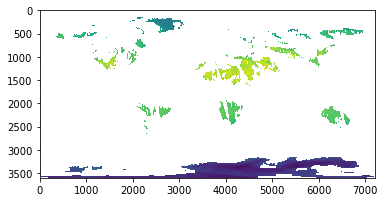

In [23]:
plt.imshow(s)

In [7]:
p=gdal.Open(r'E:\rahul\MYD11C1\MYD11C1.A2010287.061.2021180172505.hdf')

In [11]:
p.GetSubDatasets()

[('HDF4_EOS:EOS_GRID:"E:\\rahul\\MYD11C1\\MYD11C1.A2010287.061.2021180172505.hdf":MODIS_CMG_3MIN_LST:LST_Day_CMG',
  '[3600x7200] LST_Day_CMG MODIS_CMG_3MIN_LST (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"E:\\rahul\\MYD11C1\\MYD11C1.A2010287.061.2021180172505.hdf":MODIS_CMG_3MIN_LST:QC_Day',
  '[3600x7200] QC_Day MODIS_CMG_3MIN_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"E:\\rahul\\MYD11C1\\MYD11C1.A2010287.061.2021180172505.hdf":MODIS_CMG_3MIN_LST:Day_view_time',
  '[3600x7200] Day_view_time MODIS_CMG_3MIN_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"E:\\rahul\\MYD11C1\\MYD11C1.A2010287.061.2021180172505.hdf":MODIS_CMG_3MIN_LST:Day_view_angl',
  '[3600x7200] Day_view_angl MODIS_CMG_3MIN_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"E:\\rahul\\MYD11C1\\MYD11C1.A2010287.061.2021180172505.hdf":MODIS_CMG_3MIN_LST:LST_Night_CMG',
  '[3600x7200] LST_Night_CMG MODIS_CMG_3MIN_LST (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"E:\\rahul\\MYD11C1\\MYD11C1.A